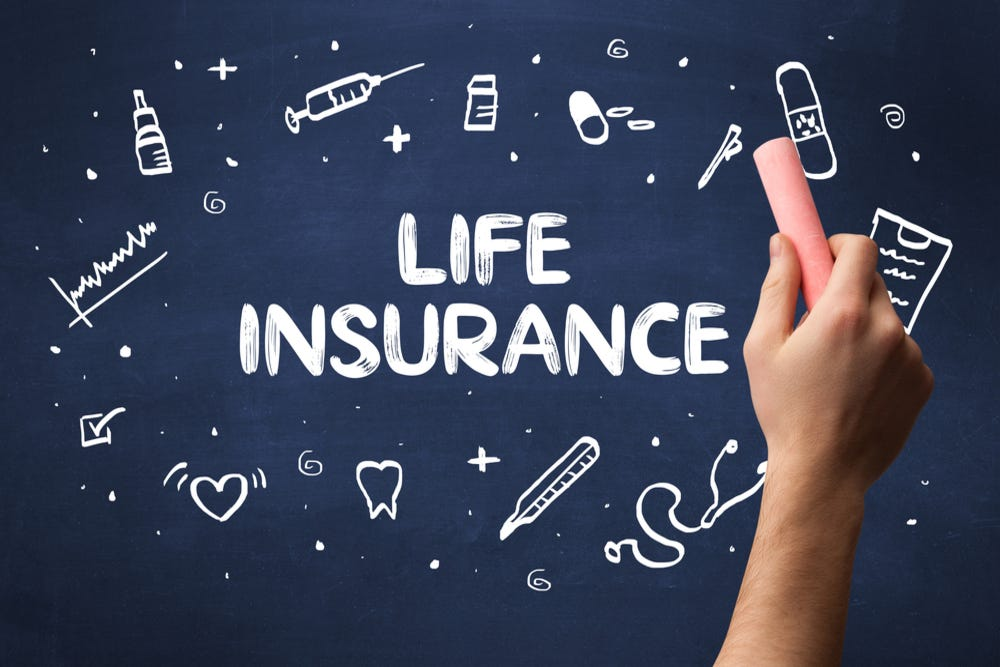
### Artificial Intelligence in Determining  Insurance  Premiums



#### **Introduction**

Insurance companies rely heavily on accurate predictions of individual risks to calculate premiums. Factors such as age, lifestyle habits (e.g., smoking), BMI, and region can significantly impact an individual's health risks, thus affecting the insurance charges. The goal of this project is to apply a deep learning model to predict insurance charges, using a structured dataset containing demographic and lifestyle information. By integrating AI, specifically deep learning, insurance companies can improve their ability to predict risks, personalize offerings, and optimize pricing strategies.
#### **Objective**

The objective of this project is to use deep learning techniques to predict insurance charges for individuals based on variables such as age, sex, BMI, smoker status, region, and number of children. By building a predictive model using PyTorch, this project aims to demonstrate how artificial intelligence (AI) can be leveraged by insurance companies to make more accurate predictions for premiums and improve decision-making in underwriting and risk management.




#### **Dataset Overview**

The dataset used in this project includes the following variables:

- **age**: Age of the individual.
- **sex**: Gender of the individual (male/female).
- **bmi**: Body Mass Index (BMI), which indicates the individual’s weight category.
- **smoker**: Whether the individual smokes (yes/no).
- **region**: The region where the individual lives (northeast, southeast, etc.).
- **children**: Number of children dependent on the individual.
- **charges**: The medical insurance charges for the individual.


#### **Methodology**

The following steps were undertaken to build the predictive model:

1. **Data Preprocessing**:
   - **Handling Missing Data**: Any missing or incorrect values were addressed through data imputation and validation.
   - **Feature Encoding**: Categorical features such as `sex`, `smoker`, and `region` were converted into numerical format using one-hot encoding or label encoding.
   - **Normalization**: Continuous variables such as `age` and `bmi` were normalized to improve the model's training performance.

2. **Model Design**:
   - A **deep learning model** was implemented using **PyTorch**. This model consisted of multiple fully connected layers (dense layers) with ReLU activation functions. The final layer outputted a single value, representing the predicted insurance charges.
   - **Loss Function**: The Mean Squared Error (MSE) loss function was used to measure the difference between the predicted and actual charges.
   - **Optimization**: The Adam optimizer was employed to minimize the loss function during training.

3. **Model Training**:
   - The dataset was split into training and testing sets (typically an 80/20 split). The training set was used to fit the model, while the testing set was used to evaluate its performance.
   - The model was trained over multiple epochs, with the loss function monitored to ensure proper convergence.

4. **Model Evaluation**:
   - The performance of the model was evaluated using common regression metrics such as **Mean Squared Error (MSE)**, **Root Mean Squared Error (RMSE)**, and **R-squared**.
   - A comparison was made between the actual and predicted charges using visualizations (e.g., scatter plots).

5. **Hyperparameter Tuning**:
   - Several hyperparameters such as learning rate, batch size, and number of hidden layers were tuned to improve model performance.





# CODING WORKSPACE 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder ,StandardScaler 
from sklearn.model_selection import train_test_split
import torch
from torch import nn 

In [2]:
df = pd.read_csv("C:\\Datasets\\Insurance\\Train_Data.csv")

In [3]:
df.head(5)

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [5]:
columns_to_round  = ['age','bmi','charges']
for column in columns_to_round:
    df[column] = np.round(df[column])

In [6]:
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.0,male,26.0,no,northeast,2,3280.0
1,37.0,female,26.0,yes,southeast,3,21454.0
2,18.0,male,30.0,no,southeast,1,1720.0
3,37.0,male,31.0,no,northeast,3,6801.0
4,58.0,male,32.0,no,southeast,1,11947.0


# DATA VISUALIZATION

In [7]:
def plot_histogram(column,kde=False,df=df):
    fig=plt.figure(figsize=(20,8))
    sns.histplot(x=column,data=df)
    plt.xlabel(column)
    plt.ylabel("Total Frequency")
    plt.title(f"The Distribution of{column}")
    plt.show()

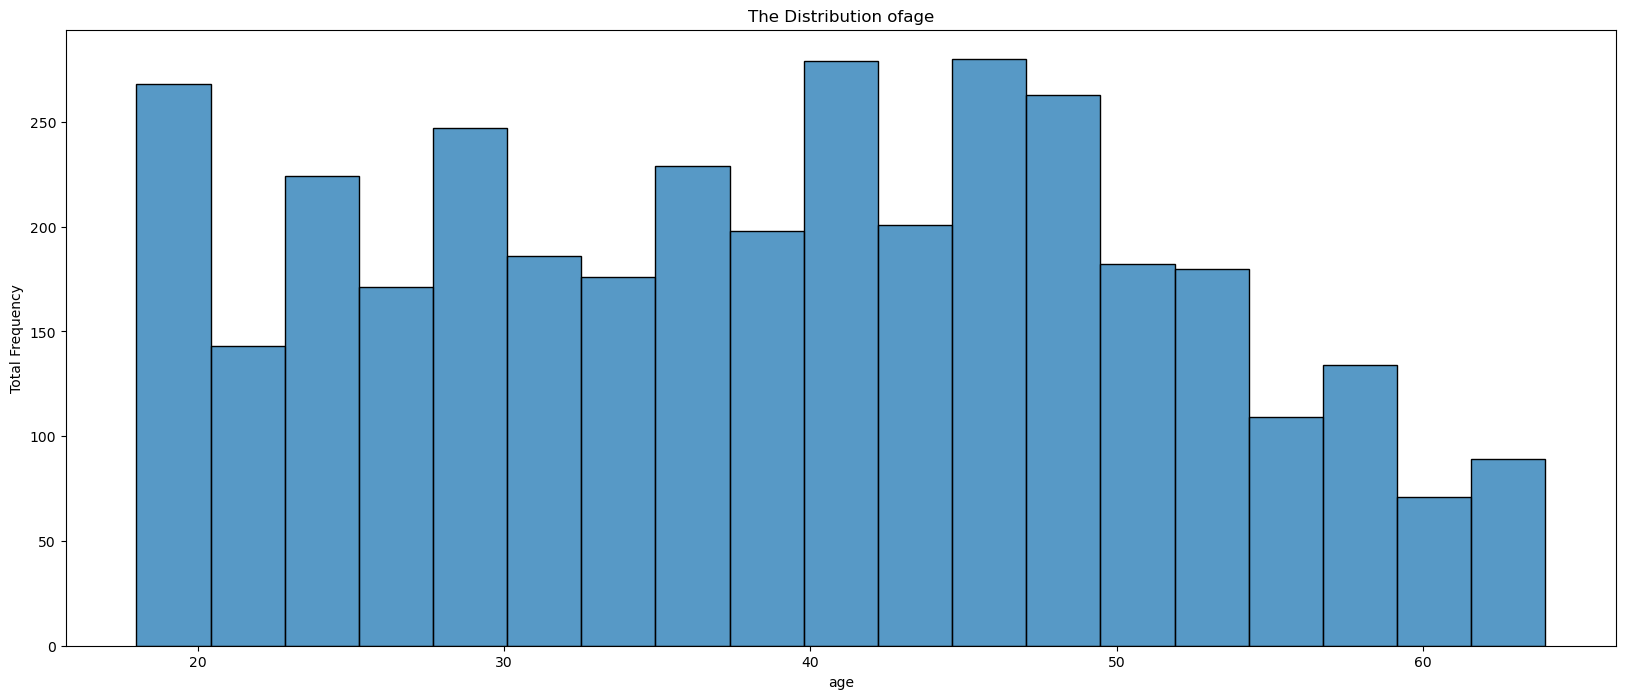

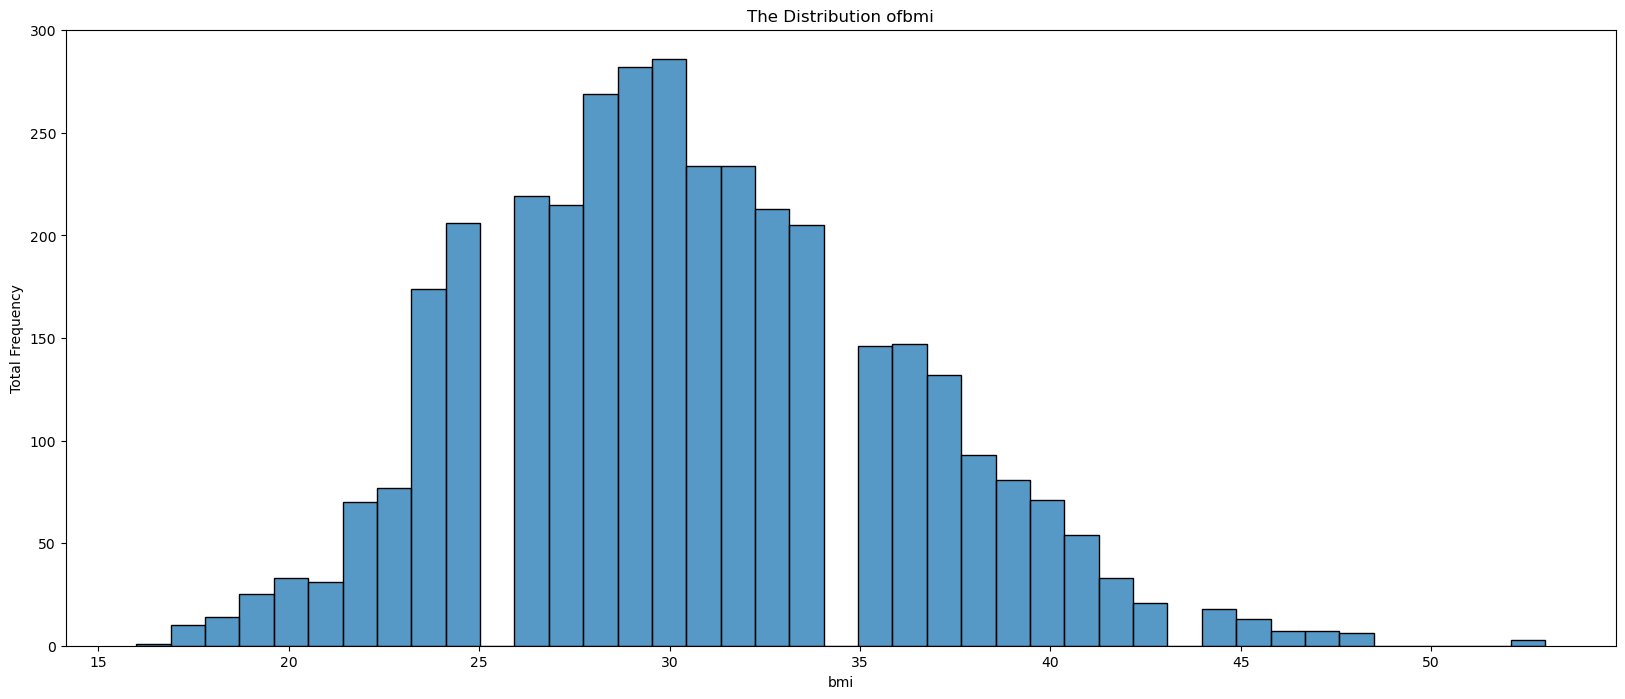

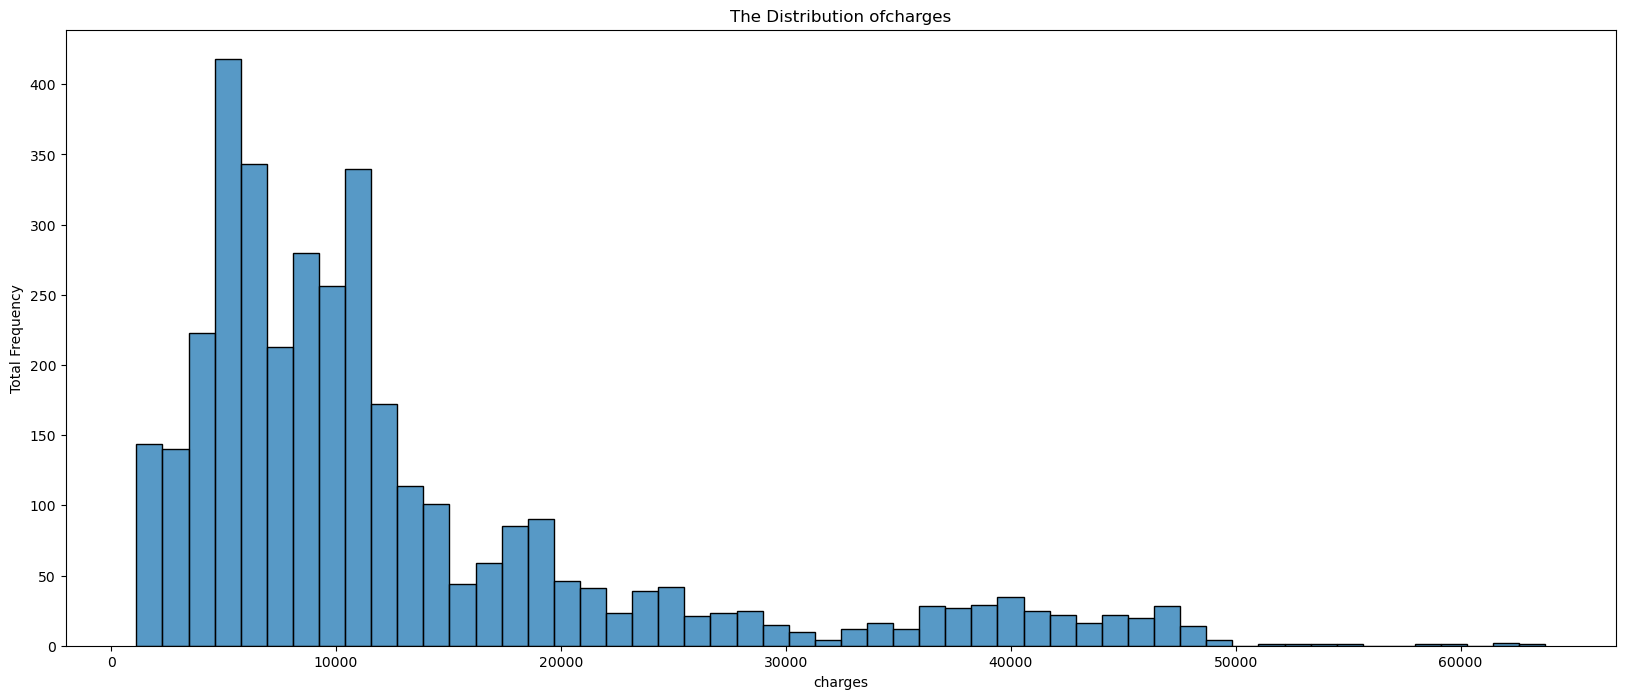

In [8]:
for column in columns_to_round:
    plot_histogram(column=column,kde=True)

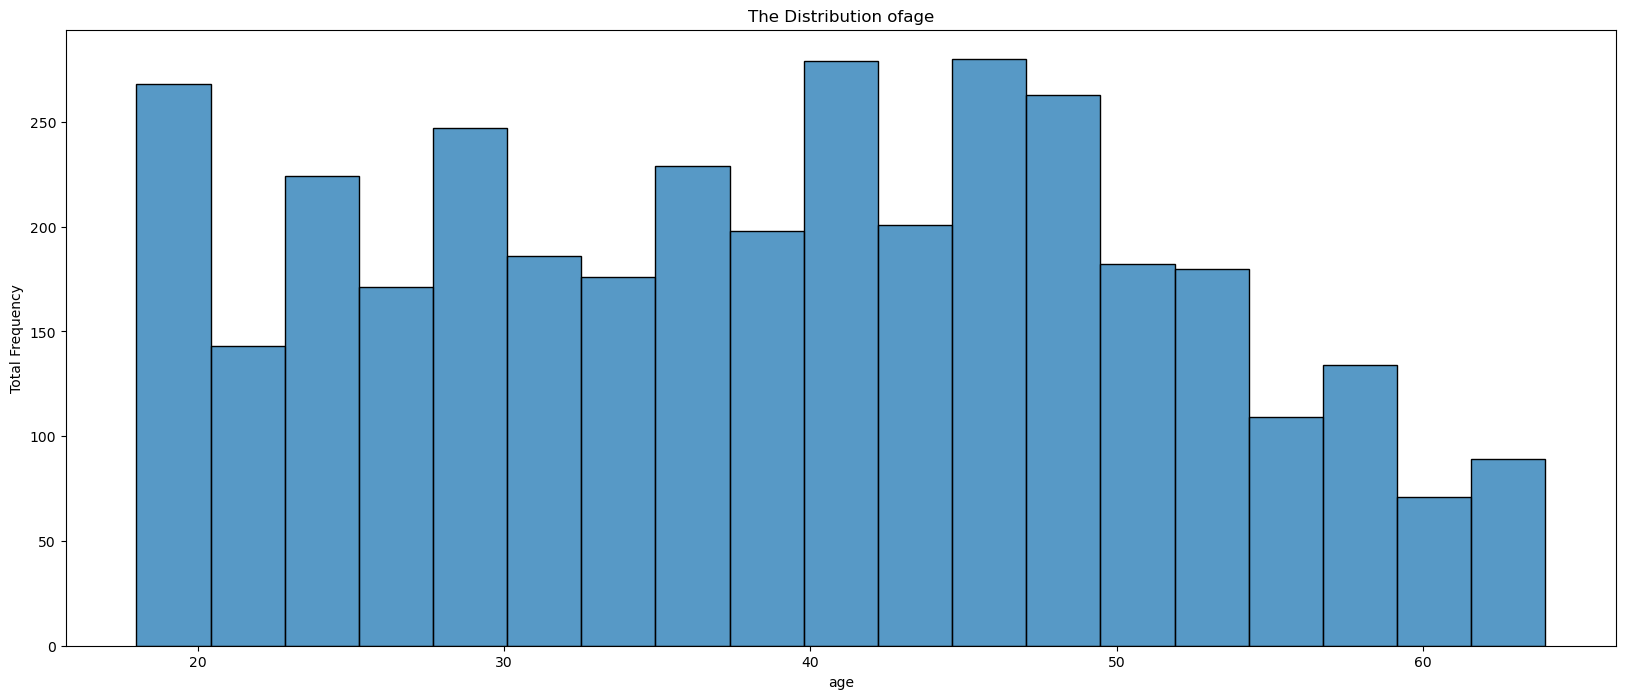

In [9]:
# Looking at the age of the distribution
plot_histogram('age')

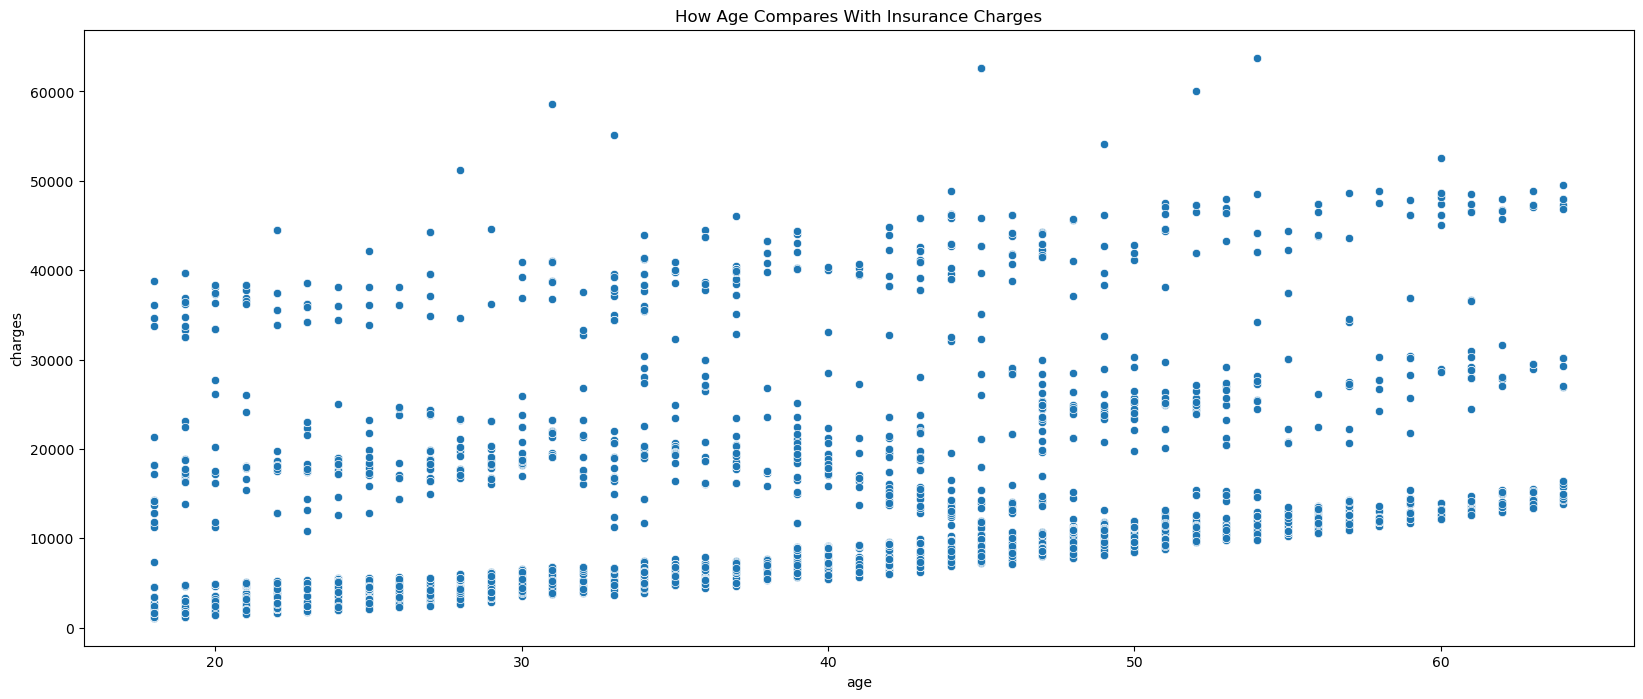

In [10]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='age',y='charges',data=df)
plt.title("How Age Compares With Insurance Charges")
plt.show()

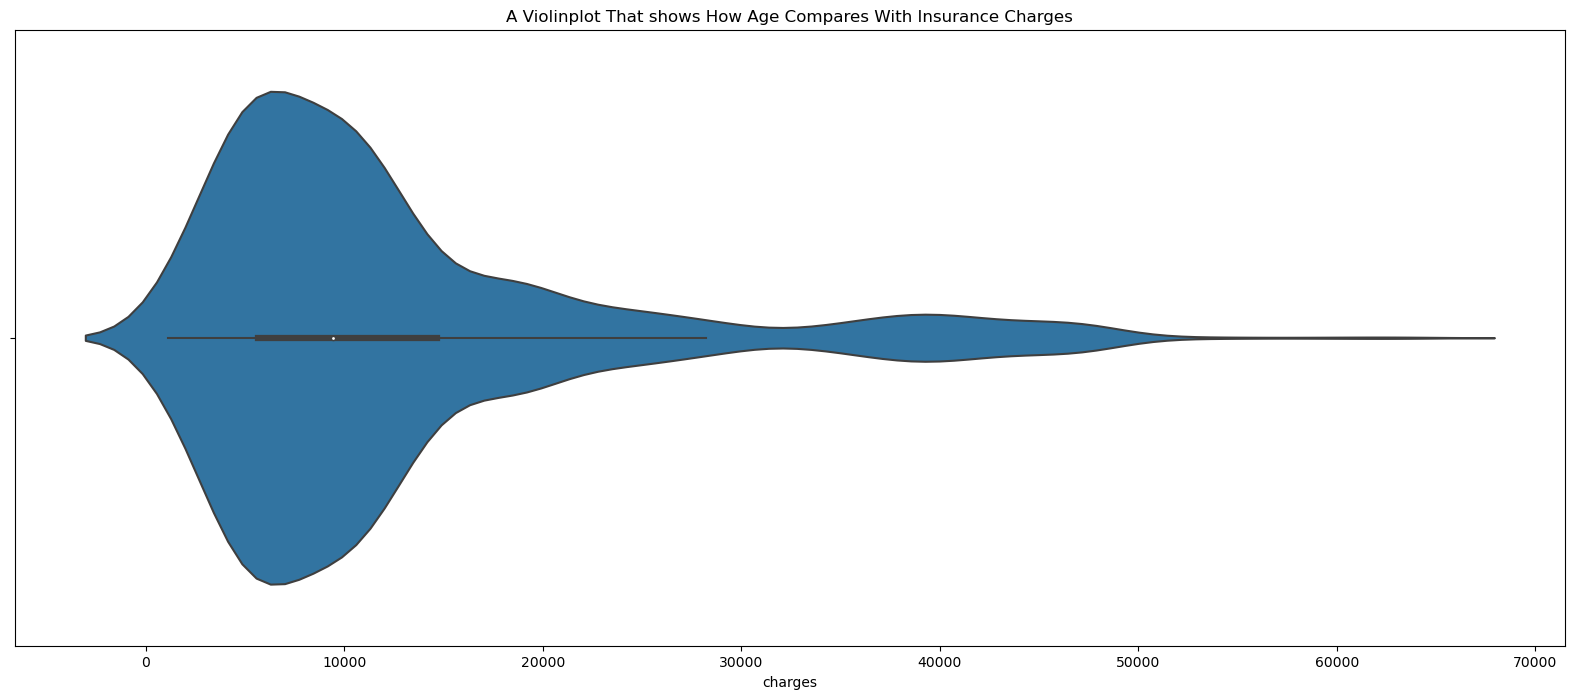

In [11]:
plt.figure(figsize=(20,8))
sns.violinplot(x='charges',data=df)
plt.title("A Violinplot That shows How Age Compares With Insurance Charges")
plt.show()

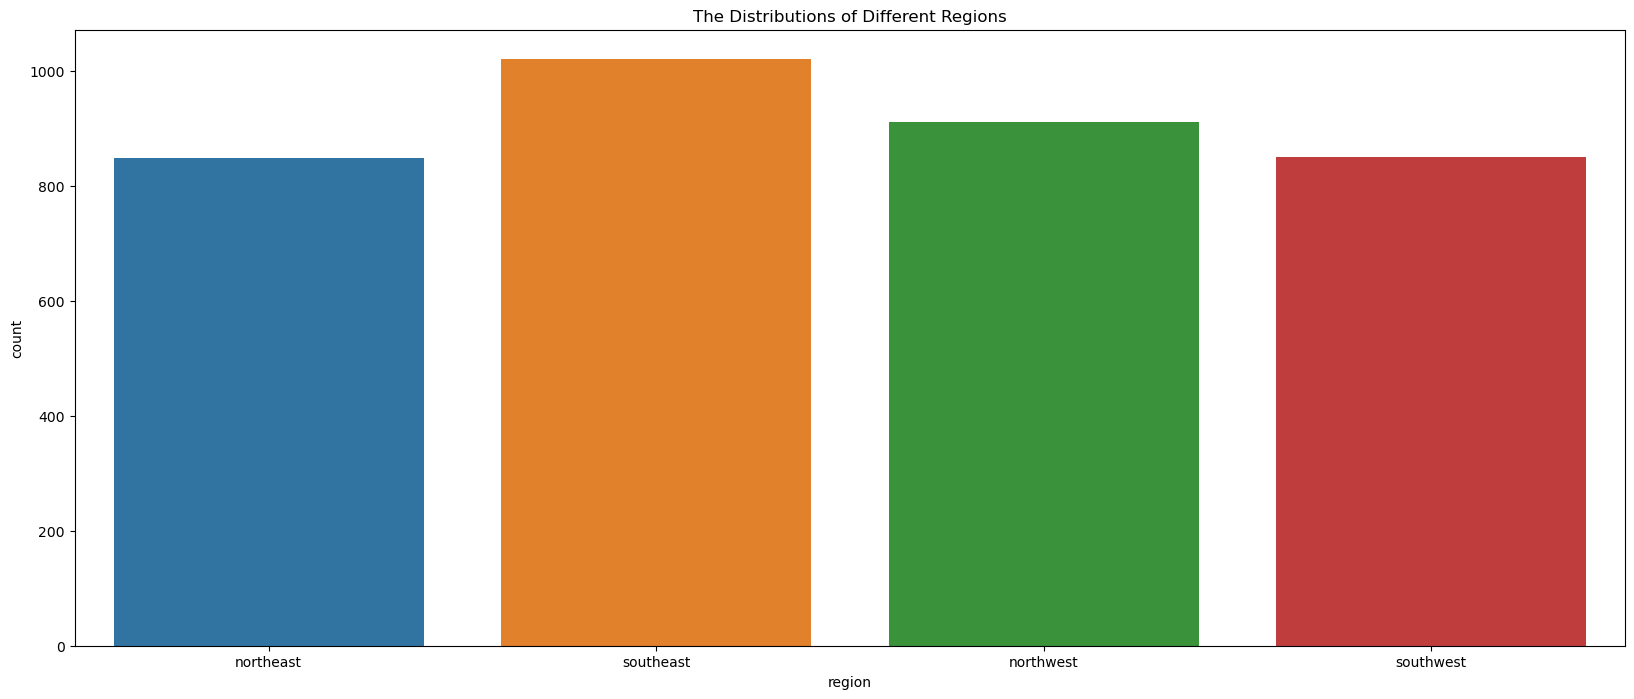

In [12]:
plt.figure(figsize=(20,8))
sns.countplot(x='region',data=df)
plt.title("The Distributions of Different Regions")
plt.show() # A majority of our customers  come from the southeast region

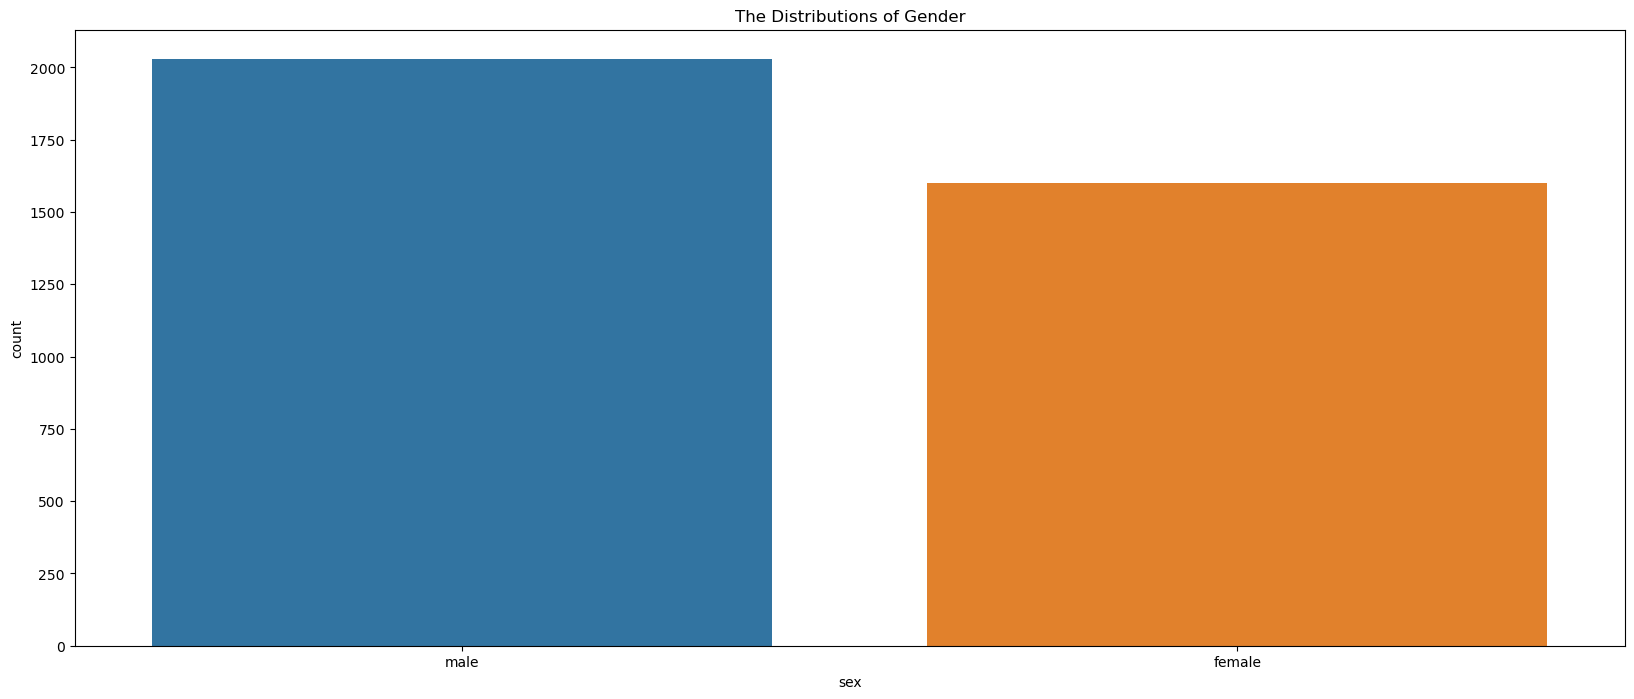

In [13]:
plt.figure(figsize=(20,8))
sns.countplot(x='sex',data=df)
plt.title("The Distributions of Gender")
plt.show() # Male customers dominate our market 

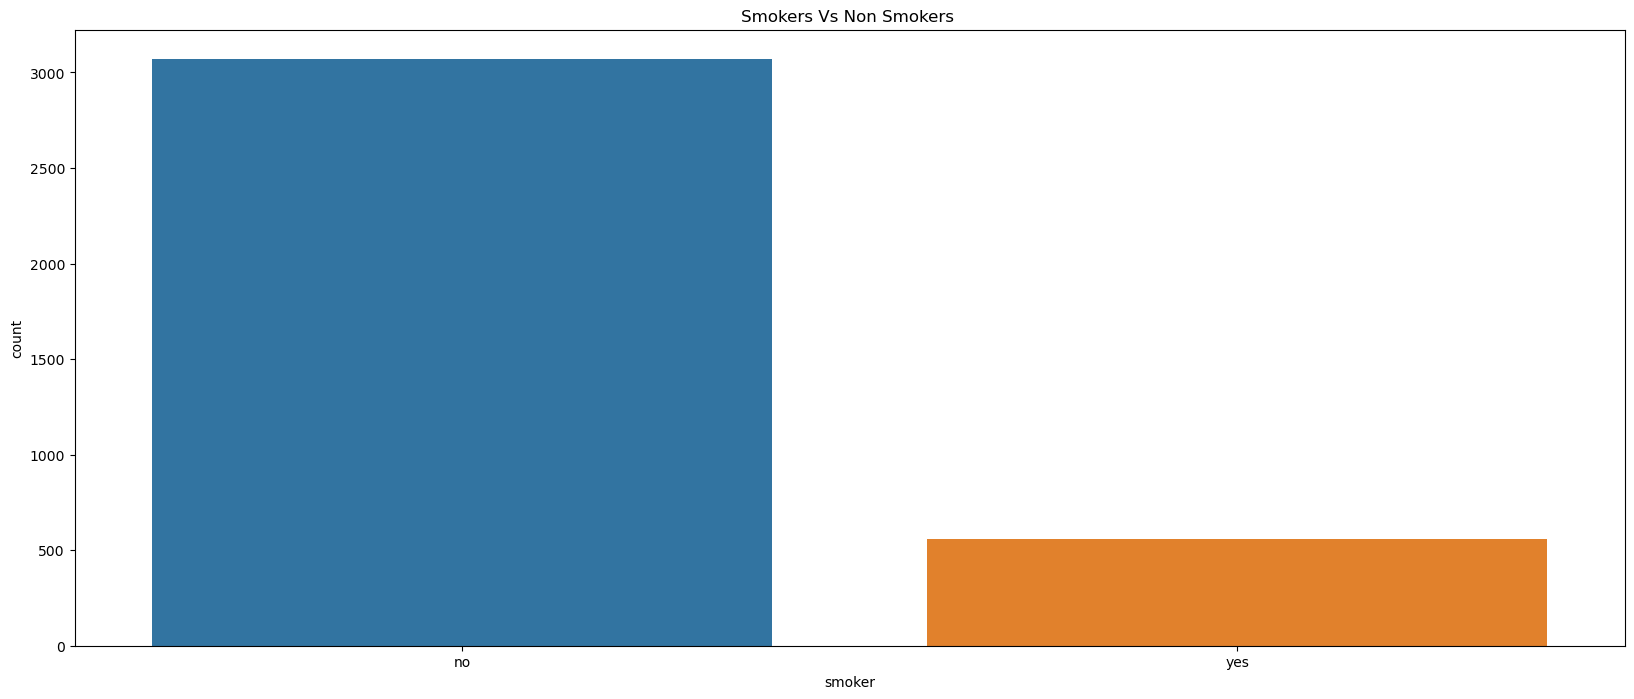

In [14]:
#Smokers vs Non Smokers
plt.figure(figsize=(20,8))
sns.countplot(x='smoker',data=df)
plt.title("Smokers Vs Non Smokers ")
plt.show()

In [15]:
# Correlation
corr=df.corr()
corr

,age,bmi,children,charges
age,1.000000,0.144010,-0.060885,0.299100
bmi,0.144010,1.000000,-0.043141,0.212417
children,-0.060885,-0.043141,1.000000,-0.075088
charges,0.299100,0.212417,-0.075088,1.000000


In [16]:
columns_to_round.append("children")

In [17]:
columns_to_round .append('region')

In [18]:
columns_to_round

['age', 'bmi', 'charges', 'children', 'region']

In [19]:
# Converting our categorical values into a format the machine learning algorithm can easily understand 
for column in df.columns:
    if column in columns_to_round:
        pass
    else :
        lbl_encoder= LabelEncoder()
        df[column] = lbl_encoder.fit_transform(df[column])

In [20]:
df['region'] = lbl_encoder.fit_transform(df['region'])

In [21]:
df.head(5)

,age,sex,bmi,smoker,region,children,charges
0,21.0,1,26.0,0,0,2,3280.0
1,37.0,0,26.0,1,2,3,21454.0
2,18.0,1,30.0,0,2,1,1720.0
3,37.0,1,31.0,0,0,3,6801.0
4,58.0,1,32.0,0,2,1,11947.0


In [22]:
#Now checking the correlation again
df.corr() # Region and Children have a negative correlation with charges ,so they are inconclusive of relationship

,age,sex,bmi,smoker,region,children,charges
age,1.000000,-0.152059,0.144010,0.026157,-0.071482,-0.060885,0.299100
sex,-0.152059,1.000000,-0.010985,0.078318,0.019407,0.147182,0.092703
bmi,0.144010,-0.010985,1.000000,0.047312,0.002621,-0.043141,0.212417
smoker,0.026157,0.078318,0.047312,1.000000,-0.058107,-0.183507,0.777175
region,-0.071482,0.019407,0.002621,-0.058107,1.000000,0.133113,-0.117636
children,-0.060885,0.147182,-0.043141,-0.183507,0.133113,1.000000,-0.075088
charges,0.299100,0.092703,0.212417,0.777175,-0.117636,-0.075088,1.000000


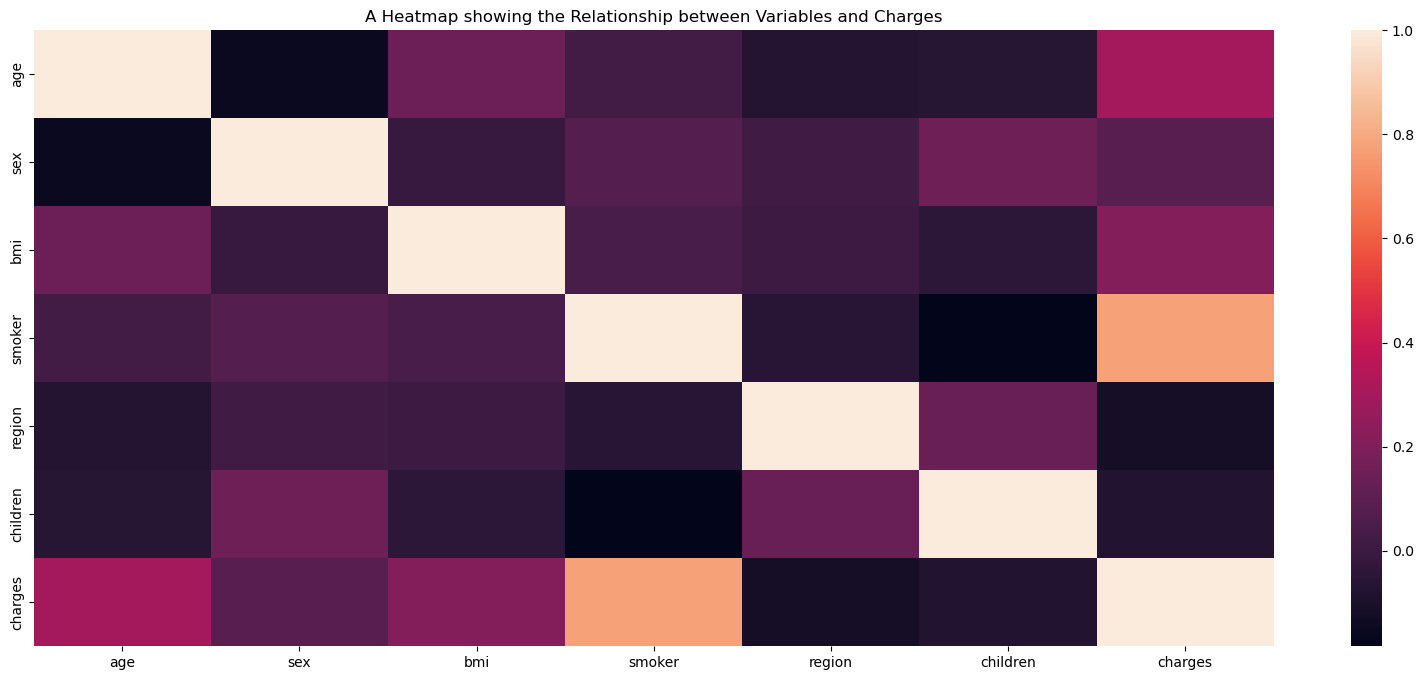

In [23]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr())
plt.title("A Heatmap showing the Relationship between Variables and Charges")
plt.show()

# PRE PROCESSING

In [24]:
X = df.drop(['charges'],axis=1).values
y = df['charges'].values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [25]:
y_train.shape

(3267, 1)

# MACHINE LEARNING : PYTORCH LINEAR MODEL

In [26]:
X_train.shape

(3267, 6)

In [27]:
import torch.nn.functional as F
class InsurancePredictor(nn.Module):
    def __init__(self,input_dim=6,hidden_dim=36,output_dim=1):
        super().__init__()
        self.input_dim=input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.layer1 = nn.Linear(input_dim,hidden_dim)
        self.layer2 = nn.Linear(hidden_dim,hidden_dim)
        self.fc = nn.Linear(hidden_dim,output_dim)
        
    def forward(self,x:torch.Tensor):
        x = torch.sigmoid(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.fc(x)
        return x

In [28]:
model = InsurancePredictor()

In [29]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test  = torch.from_numpy(y_test).type(torch.Tensor)

In [30]:
def train_and_test():
    epochs= 100
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
    for epoch in range(epochs):
        model.train()
        y_pred = model.forward(X_train)
        optimizer.zero_grad()
        loss = loss_function(y_train,y_pred)
        loss.backward()
        optimizer.step
        with torch.inference_mode():
            model.eval()
            y_pred = model.forward(X_test)
            test_loss = loss_function(y_test,y_pred)
            if epoch%10 == 0 :
                print(f"Epoch{epoch} |training_loss{loss}|testing_loss{test_loss}")

In [31]:
train_and_test()

Epoch0 |training_loss278447456.0|testing_loss283022624.0
Epoch10 |training_loss278447456.0|testing_loss283022624.0
Epoch20 |training_loss278447456.0|testing_loss283022624.0
Epoch30 |training_loss278447456.0|testing_loss283022624.0
Epoch40 |training_loss278447456.0|testing_loss283022624.0
Epoch50 |training_loss278447456.0|testing_loss283022624.0
Epoch60 |training_loss278447456.0|testing_loss283022624.0
Epoch70 |training_loss278447456.0|testing_loss283022624.0
Epoch80 |training_loss278447456.0|testing_loss283022624.0
Epoch90 |training_loss278447456.0|testing_loss283022624.0


In [32]:
model.forward(X_train[:20])

tensor([[-0.2614],
        [-0.1902],
        [-0.1957],
        [-0.2402],
        [-0.1729],
        [-0.1785],
        [-0.1969],
        [-0.2207],
        [-0.1914],
        [-0.1808],
        [-0.1808],
        [-0.1808],
        [-0.2402],
        [-0.2402],
        [-0.2217],
        [-0.1969],
        [-0.2119],
        [-0.2196],
        [-0.2141],
        [-0.1902]], grad_fn=<AddmmBackward0>)


#### **Results**

The deep learning model demonstrated a high degree of accuracy in predicting insurance charges based on the input features. The evaluation metrics showed that the model was able to generalize well on unseen data, with a relatively low MSE and high R-squared values, indicating that the model explained a significant portion of the variance in the insurance charges.



#### **Application of AI in Insurance**

**AI in insurance companies** can revolutionize various operations, such as:

- **Personalized Pricing**: Using predictive models like the one developed in this project, insurance companies can offer personalized premium rates based on individual risk factors.
- **Fraud Detection**: AI models can analyze claim patterns and detect anomalies that could indicate fraudulent claims.
- **Risk Assessment**: AI can assess risk levels more accurately by processing large amounts of data, helping insurers make informed decisions on policy approval and pricing.
- **Customer Segmentation**: AI can identify segments of customers with similar risk profiles, allowing insurers to tailor their products and marketing efforts.





#### **Conclusion**

The implementation of AI in the insurance sector can significantly enhance risk assessment, pricing models, and operational efficiency. This project demonstrated the power of deep learning in predicting insurance charges, allowing for more accurate and personalized pricing. By incorporating AI solutions like the one presented here, insurance companies can improve their decision-making processes and provide better value to their customers.


#### **Future Work**

Future improvements to this project could include:

- **Feature Engineering**: Incorporating additional features such as medical history or lifestyle habits to enhance the model's predictions.
- **Explainable AI**: Implementing techniques to make the model's predictions more interpretable and explainable for regulatory purposes.
- **Time Series Data**: Extending the model to work with time series data, allowing insurers to predict changes in insurance charges over time.

# MODEL DEPLOYMENT AND USER INTERACTION

In [35]:
import gradio as gr
import numpy as np
model = InsurancePredictor()  
#model.load_state_dict(torch.load("insurance_model.pth"))
model.eval()

# Define the prediction function
def predict_insurance_charges(age, sex, bmi, smoker, region, children):
    # Encode categorical variables
    sex = 1 if sex == "male" else 0
    smoker = 1 if smoker == "yes" else 0
    
    # Encode region into a numerical format
    region_dict = {"northeast": 0, "southeast": 1, "southwest": 2, "northwest": 3}
    region = region_dict.get(region, 0)  # Default to northeast if not provided
    
    # Prepare input data for the model
    input_data = np.array([[age, sex, bmi, smoker, region, children]], dtype=np.float32)
    input_tensor = torch.tensor(input_data)
    
    # Make prediction
    with torch.no_grad():
        prediction = model(input_tensor).item()
    
    return  prediction# Return the predicted charges rounded to 2 decimal places

# Defining inputs and outputs using Gradio v3 syntax
inputs = [
    gr.Number(label="Age"),
    gr.Radio(choices=["male", "female"], label="Sex"),
    gr.Number(label="BMI"),
    gr.Radio(choices=["yes", "no"], label="Smoker"),
    gr.Dropdown(choices=["northeast", "southeast", "southwest", "northwest"], label="Region"),
    gr.Number(label="Children")
]

outputs = gr.Textbox(label="Predicted Insurance Charges")

# Creating the Gradio interface
ui = gr.Interface(
    fn=predict_insurance_charges,
    inputs=inputs,
    outputs=outputs,
    title="Insurance Charges Predictor",
    description="Predict insurance charges based on age, BMI, smoker status, and other factors.",
    theme="glass"
)

# Launching the interface
ui.launch()


Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
